In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.w, self.b, self.lr, self.epochs = np.random.rand(input_size), np.random.rand(), lr, epochs

    def predict(self, inputs):
        return 1 if np.dot(inputs, self.w) + self.b >= 0 else -1

    def train(self, data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(data, labels):
                self.w += self.lr * (label - self.predict(inputs)) * inputs
                self.b += self.lr * (label - self.predict(inputs))

            if epoch % 10 == 0:
                acc = np.mean([self.predict(x) == label for x, label in zip(data, labels)])
                print(f"Epoch {epoch}/{self.epochs}, Accuracy: {acc:.2%}")

    def decision_boundary(self, x):
        return -(self.w[0] * x + self.b) / self.w[1]

In [3]:
np.random.seed(42)

# Example usage:
input_size = 2
p = Perceptron(input_size)

# Define data and labels in the same cell
c1, c2 = np.random.rand(50, input_size) * 0.5, np.random.rand(50, input_size) * 0.5 + 0.5
data, labels = np.concatenate((c1, c2), axis=0), np.concatenate((np.ones(50), -np.ones(50)))

p.train(data, labels)

Epoch 0/100, Accuracy: 42.00%
Epoch 10/100, Accuracy: 97.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 40/100, Accuracy: 100.00%
Epoch 50/100, Accuracy: 100.00%
Epoch 60/100, Accuracy: 100.00%
Epoch 70/100, Accuracy: 100.00%
Epoch 80/100, Accuracy: 100.00%
Epoch 90/100, Accuracy: 100.00%


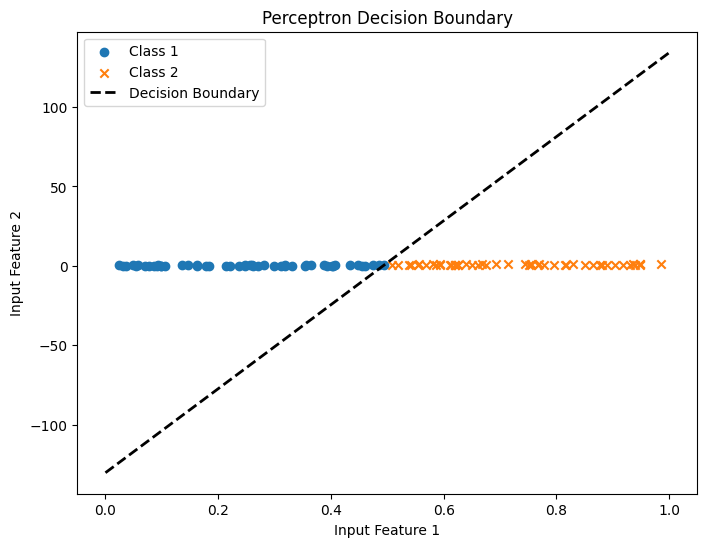

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(c1[:, 0], c1[:, 1], label='Class 1', marker='o')
plt.scatter(c2[:, 0], c2[:, 1], label='Class 2', marker='x')
plt.plot(np.linspace(0, 1, 100), p.decision_boundary(np.linspace(0, 1, 100)), 'k--', label='Decision Boundary', linewidth=2)

plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()